<a href="https://colab.research.google.com/github/wal-03/Case-Study-3---Data-Mining/blob/main/Data_Mining_Case_Study_03_Kelompok_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PrettyTable
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(["NIM", "Nama"])

# Add rows
myTable.add_row(["11210940000073", "Tonny Pramudya Bagus Santoso"])
myTable.add_row(["11220940000055", "Miranita Anisa Rohmah"])
myTable.add_row(["11220940000056", "Syafiqah Marsya Kholiyadi"])
myTable.add_row(["11220940000064", "Fadhilah Awal Rizqiansyah"])

print(myTable)

+----------------+------------------------------+
|      NIM       |             Nama             |
+----------------+------------------------------+
| 11210940000073 | Tonny Pramudya Bagus Santoso |
| 11220940000055 |    Miranita Anisa Rohmah     |
| 11220940000056 |  Syafiqah Marsya Kholiyadi   |
| 11220940000064 |  Fadhilah Awal Rizqiansyah   |
+----------------+------------------------------+


# Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

file_ = 'data/Ashrae_Energy_Mean.csv'
try: #Loading Locally
    df = pd.read_csv(file_)
except Exception as err_:
    print(err_, " Trying to load data from GitHub.")
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/Ashrae_Energy_Mean.csv
    df = pd.read_csv(file_)

print(df.shape)
df.head()

(1413, 12)


,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472


In [ ]:
df.columns

Index(['meter_reading', 'primary_use', 'square_feet', 'year_built',
       'floor_count', 'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed'],
      dtype='object')

# Preprocessing

## Info data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meter_reading       1413 non-null   float64
 1   primary_use         1413 non-null   object 
 2   square_feet         1413 non-null   int64  
 3   year_built          663 non-null    float64
 4   floor_count         352 non-null    float64
 5   air_temperature     1413 non-null   float64
 6   cloud_coverage      1396 non-null   float64
 7   dew_temperature     1413 non-null   float64
 8   precip_depth_1_hr   1237 non-null   float64
 9   sea_level_pressure  1324 non-null   float64
 10  wind_direction      1413 non-null   float64
 11  wind_speed          1413 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 132.6+ KB


##Statistika Deskriptif

In [ ]:
df.describe()

,meter_reading,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,1413.000000,1413.000000,663.000000,352.000000,1413.000000,1396.000000,1413.000000,1237.000000,1324.000000,1413.000000,1413.000000
mean,185.383188,92204.792640,1968.170437,3.738636,15.697154,2.166618,8.259831,1.187860,1016.466990,175.351051,3.564617
std,374.899500,111412.340117,31.026539,3.336731,5.416736,1.461644,4.625295,1.478667,1.921973,24.921236,0.737746
min,0.000400,283.000000,1900.000000,1.000000,7.572136,0.059266,-0.304675,0.155325,1011.436563,123.388701,2.157103
25%,27.224943,22949.000000,1949.500000,1.000000,11.058629,0.665832,4.512823,0.775686,1016.404579,153.629430,3.100911
50%,74.933148,57673.000000,1970.000000,3.000000,15.204244,2.083712,8.285693,0.895980,1016.797495,184.295922,3.619547
75%,182.884848,115288.000000,1995.500000,5.000000,21.325261,2.998727,9.834399,1.033215,1017.949437,187.301104,3.905433
max,5072.323426,875000.000000,2017.000000,26.000000,24.963702,5.671785,17.379328,11.675633,1018.052063,207.134076,5.493939


## Ubah tipe data

In [ ]:
df.dtypes

,0
meter_reading,float64
primary_use,object
square_feet,int64
year_built,float64
floor_count,float64
air_temperature,float64
cloud_coverage,float64
dew_temperature,float64
precip_depth_1_hr,float64
sea_level_pressure,float64


In [ ]:
df['floor_count']= df['floor_count'].fillna(0).astype('int64')

In [ ]:
df['primary_use'] = df['primary_use'].astype('category')
df['year_built'] = df['year_built'].fillna(0).astype('int64') #pd.to_datetime(df['year_built'], format='%Y')

In [ ]:
df['floor_count'] = df['floor_count'].replace(0, np.nan)
df['year_built'] = df['year_built'].replace(0, np.nan)

## Noise

In [ ]:
# membuat fungsi untuk memeriksa unik pada setiap variabel
def cekdf(df):
  list_kolom = list(df.columns)
  for i in list_kolom:
    print("\n",i)
    print(df[i].unique())

cekdf(df)


 meter_reading
[237.7491275  118.55374309  23.62649987 ...   7.21134691 187.11799411
   3.33859478]

 primary_use
['Education', 'Lodging/residential', 'Office', 'Entertainment/public assembly', 'Other', ..., 'Healthcare', 'Utility', 'Technology/science', 'Manufacturing/industrial', 'Services']
Length: 16
Categories (16, object): ['Education', 'Entertainment/public assembly',
                          'Food sales and service', 'Healthcare', ..., 'Services', 'Technology/science',
                          'Utility', 'Warehouse/storage']

 square_feet
[ 7432  2720  5376 ... 11265 29775 92271]

 year_built
[2008. 2004. 1991. 2002. 1975. 2000. 1981. 1989. 2003. 2010. 1968. 1999.
 2013. 1974. 1996. 1980. 1977. 1990. 1985. 2001. 1969. 2005. 2016. 2006.
 2014. 1970. 1971. 2011. 1997. 2007. 1998. 2009. 1979. 1986. 1982. 1983.
   nan 1913. 1953. 1909. 1958. 1960. 1976. 1906. 1900. 1995. 1956. 1930.
 1967. 1919. 1955. 1965. 1907. 2012. 1992. 1948. 1950. 1941. 1957. 1964.
 1940. 1951. 1966. 1934.

## Missing Value

In [ ]:
df.isnull().sum()

,0
meter_reading,0
primary_use,0
square_feet,0
year_built,750
floor_count,1061
air_temperature,0
cloud_coverage,17
dew_temperature,0
precip_depth_1_hr,176
sea_level_pressure,89


In [ ]:
missing_year_built = df['year_built'].isnull().mean() * 100
missing_floor_count = df['floor_count'].isnull().mean() * 100
print(f"Missing 'year_built': {missing_year_built:.2f}%")
print(f"Missing 'floor_count': {missing_floor_count:.2f}%")


Missing 'year_built': 53.08%
Missing 'floor_count': 75.09%


In [ ]:
print(df[['floor_count', 'meter_reading']].corr())
print(df[['year_built', 'meter_reading']].corr())


               floor_count  meter_reading
floor_count       1.000000       0.446672
meter_reading     0.446672       1.000000
               year_built  meter_reading
year_built        1.00000        0.14427
meter_reading     0.14427        1.00000


In [ ]:
# Karena banyaknya missing value untuk variabel year_built dan floor_count >50% data maka kedua variabel akan dihapus
drop_columns = ['year_built', 'floor_count']
df.drop(drop_columns, axis=1, inplace=True)

In [ ]:
#df['year_built'].fillna(df['year_built'].median(), inplace=True)
#df['floor_count'].fillna(df['floor_count'].mode()[0], inplace=True)
df['precip_depth_1_hr'].fillna(df['precip_depth_1_hr'].median(), inplace=True)
df['cloud_coverage'].fillna(df['cloud_coverage'].median(), inplace=True)
df['sea_level_pressure'].fillna(df['sea_level_pressure'].median(), inplace=True)

<ipython-input-15-e264ea085665>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['precip_depth_1_hr'].fillna(df['precip_depth_1_hr'].median(), inplace=True)
<ipython-input-15-e264ea085665>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [ ]:
df.isnull().sum()

,0
meter_reading,0
primary_use,0
square_feet,0
air_temperature,0
cloud_coverage,0
dew_temperature,0
precip_depth_1_hr,0
sea_level_pressure,0
wind_direction,0
wind_speed,0


## Duplikasi

In [ ]:
df.duplicated().sum()

0

##Outlier

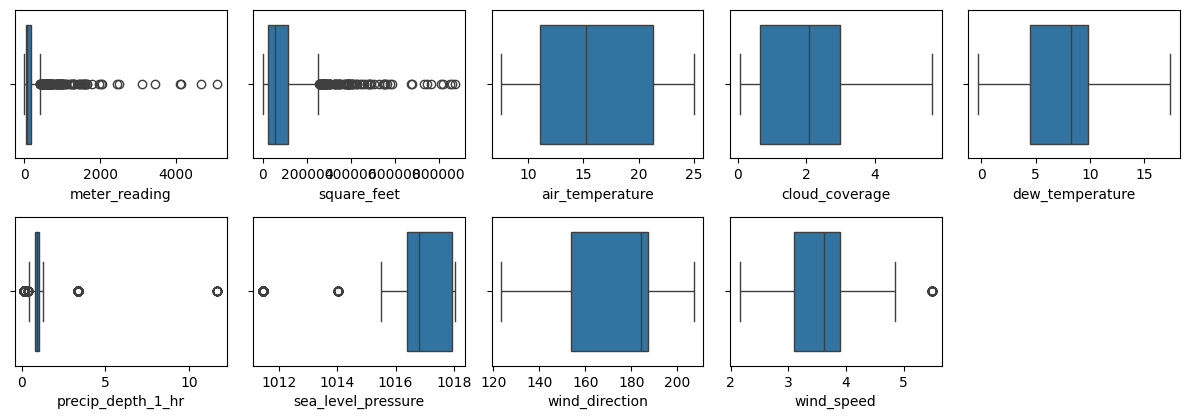

In [ ]:
plt.figure(figsize=(12,8))

for i, col in enumerate(df.describe().columns):
    plt.subplot(4,5, i+1)
    sns.boxplot(x=df[col])
    plt.tight_layout()

plt.show()

<ipython-input-19-5b09630acf1c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p= sns.distplot(df['meter_reading'])


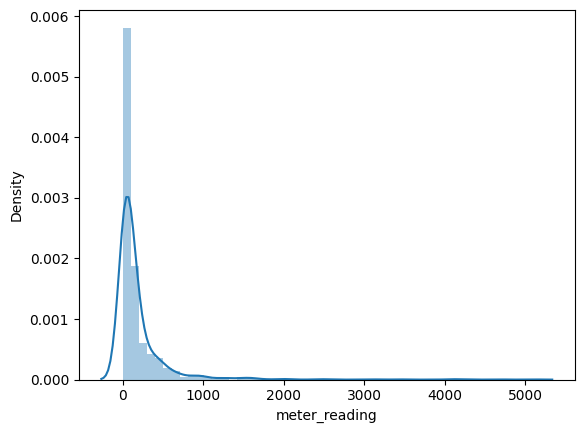

In [ ]:
p= sns.distplot(df['meter_reading'])

In [ ]:
Q1 = df['meter_reading'].quantile(0.25)
Q2 = df['meter_reading'].quantile(0.50)
Q3 = df['meter_reading'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

outliers_bawah = (df['meter_reading'] < (Q1 - 1.5 *IQR)) # Outlier bawah
outliers_atas = (df['meter_reading']  > (Q3 + 1.5 *IQR)) # Outlier atas
meter_tinggi = df.loc[outliers_bawah]
meter_rendah = df.loc[outliers_atas]

no_outlier = (df['meter_reading'] >= Q1 - 1.5 * IQR) & (df['meter_reading'] <= Q3 + 1.5 *IQR)
df_clean= df[no_outlier]
print(df.shape)
df_clean.reset_index(drop=True, inplace=True)
df_clean

Q1=27.224943203551916, Q3=182.88484841662543, IQR=155.6599052130735
(1413, 10)


,meter_reading,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,28.963481,Education,8000,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
...,...,...,...,...,...,...,...,...,...,...
1250,7.484137,Entertainment/public assembly,19619,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1251,4.732815,Education,4298,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1252,7.211347,Entertainment/public assembly,11265,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1253,187.117994,Lodging/residential,29775,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547


In [ ]:
df

,meter_reading,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
...,...,...,...,...,...,...,...,...,...,...
1408,7.484137,Entertainment/public assembly,19619,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1409,4.732815,Education,4298,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1410,7.211347,Entertainment/public assembly,11265,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1411,187.117994,Lodging/residential,29775,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547


## Pemisahan Data Train dan Data Test

In [ ]:

X = df_clean.drop('meter_reading', axis=1)
y = df_clean['meter_reading']

In [ ]:
X

,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,Education,7432,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,Education,2720,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,Education,5376,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,Education,23685,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,Education,8000,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
...,...,...,...,...,...,...,...,...,...
1250,Entertainment/public assembly,19619,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1251,Education,4298,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1252,Entertainment/public assembly,11265,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1253,Lodging/residential,29775,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X['primary_use'] = label_encoder.fit_transform(X['primary_use'])


In [ ]:
X

,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,7432,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,0,2720,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,0,5376,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,0,23685,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,0,8000,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
...,...,...,...,...,...,...,...,...,...
1250,1,19619,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1251,0,4298,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1252,1,11265,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1253,4,29775,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547


<Axes: >

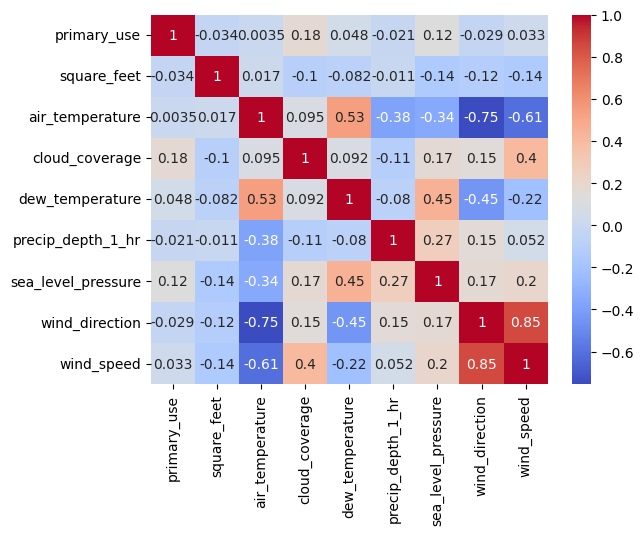

In [ ]:
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_multikolinearitas(X):
    """
    Fungsi untuk mendeteksi multikolinearitas menggunakan VIF

    Parameters:
    X (DataFrame): Data prediktor

    Returns:
    DataFrame: Hasil VIF untuk setiap variabel
    """
    # Tambahkan konstanta untuk VIF
    X_with_const = pd.DataFrame({'konstanta': [1]*len(X)}, index=X.index)
    X_with_const = pd.concat([X_with_const, X], axis=1)

    # Hitung VIF
    vif_data = pd.DataFrame()
    vif_data["Variabel"] = X_with_const.columns
    vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i)
                       for i in range(X_with_const.shape[1])]

    # Filter VIF yang tinggi
    vif_tinggi = vif_data[vif_data['VIF'] > 10]

    print("Variabel dengan Multikolinearitas Tinggi:")
    print(vif_tinggi)

    return vif_data

# Contoh penggunaan
# Pastikan X sudah di encode/preprocessing
check_multikolinearitas(X)

Variabel dengan Multikolinearitas Tinggi:
          Variabel           VIF
0        konstanta  1.565244e+06
3  air_temperature  1.066432e+01


,Variabel,VIF
0,konstanta,1.565244e+06
1,primary_use,1.055348e+00
2,square_feet,1.069891e+00
3,air_temperature,1.066432e+01
4,cloud_coverage,2.586456e+00
5,dew_temperature,6.905801e+00
6,precip_depth_1_hr,1.324562e+00
7,sea_level_pressure,5.384053e+00
8,wind_direction,6.771646e+00
9,wind_speed,8.817980e+00


In [ ]:
X = X.drop(columns=['air_temperature'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.6, random_state=42
)
print(X_train.shape, X_test.shape)

(502, 8) (753, 8)


##Standarisasi

In [ ]:
#X_test = X_test.drop(columns=['air_temperature'])

In [ ]:
X_train.columns

Index(['primary_use', 'square_feet', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed'],
      dtype='object')

In [ ]:
# Misalkan ini daftar kolom
col_num = ['square_feet', 'cloud_coverage', 'dew_temperature',
           'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction', 'wind_speed']
col_cat = ['primary_use']  # Fitur kategori yang sudah di-encode


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Standarisasi fitur numerik
scaler = MinMaxScaler()
X_train[col_num] = scaler.fit_transform(X_train[col_num])  # Data train
X_test[col_num] = scaler.transform(X_test[col_num])       # Data test

# EDA

### Distribusi Variabel Numerik

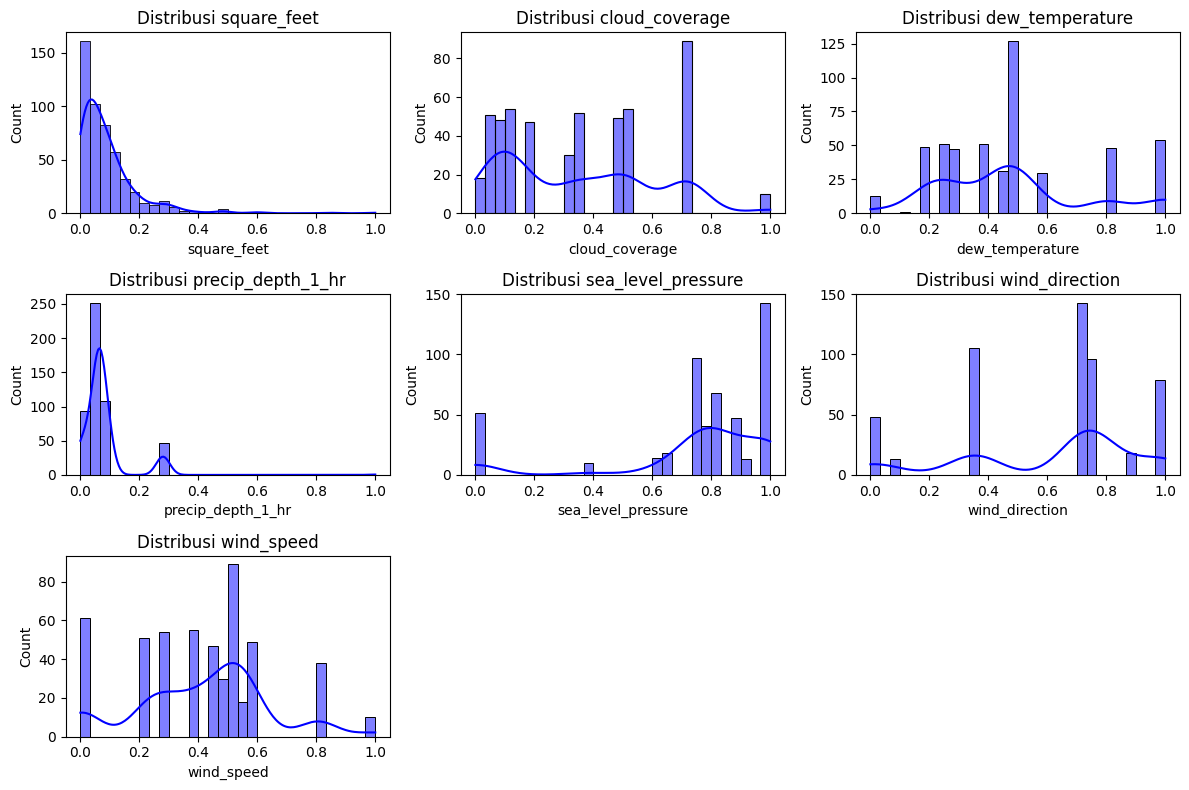

In [ ]:
# Visualisasi distribusi variabel numerik
plt.figure(figsize=(12, 8))
for i, col in enumerate(col_num):
    plt.subplot(3, 3, i+1)
    sns.histplot(X_train[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribusi {col}')
    plt.tight_layout()
plt.show()


### Korelasi Variabel Numerik

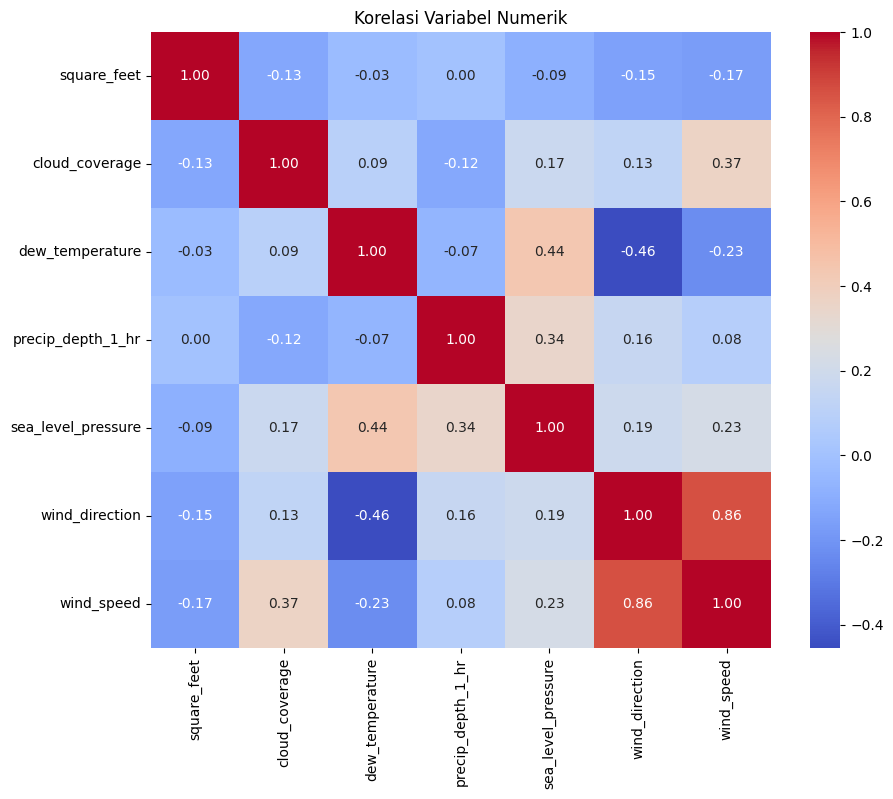

In [ ]:
# Korelasi variabel numerik
plt.figure(figsize=(10, 8))
correlation_matrix = X_train[col_num].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Variabel Numerik')
plt.show()


### Analisis Fitur Kategori

<ipython-input-36-34276b7c6398>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='primary_use', data=X_train, palette='viridis', order=X_train['primary_use'].value_counts().index)


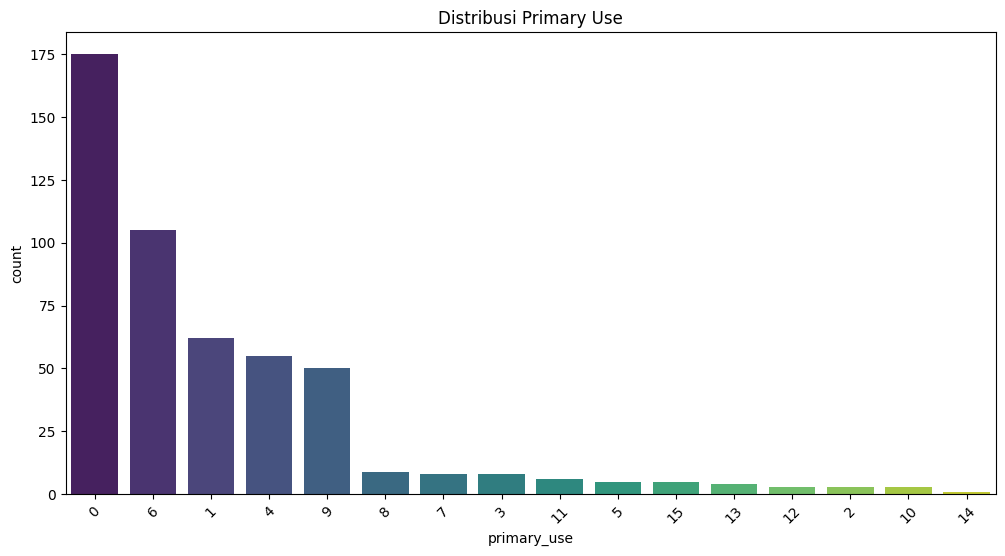

In [ ]:
# Distribusi primary_use
plt.figure(figsize=(12, 6))
sns.countplot(x='primary_use', data=X_train, palette='viridis', order=X_train['primary_use'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribusi Primary Use')
plt.show()


### Analisis Target (meter_reading)

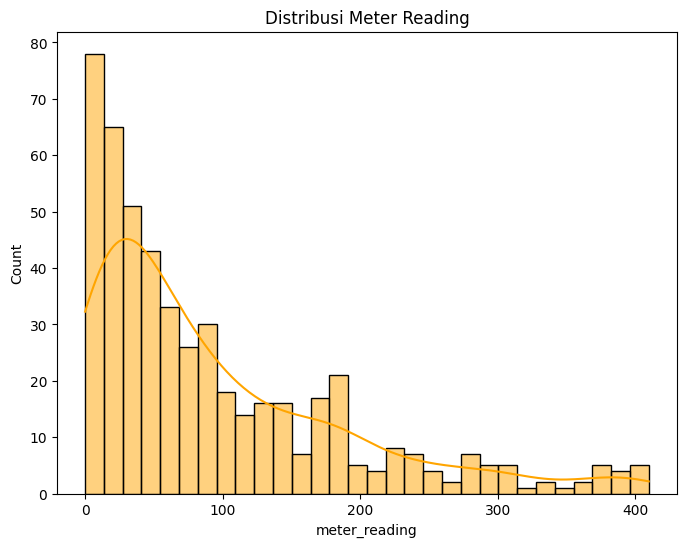

In [ ]:
# Distribusi target meter_reading
plt.figure(figsize=(8, 6))
sns.histplot(y_train, kde=True, bins=30, color='orange')
plt.title('Distribusi Meter Reading')
plt.show()


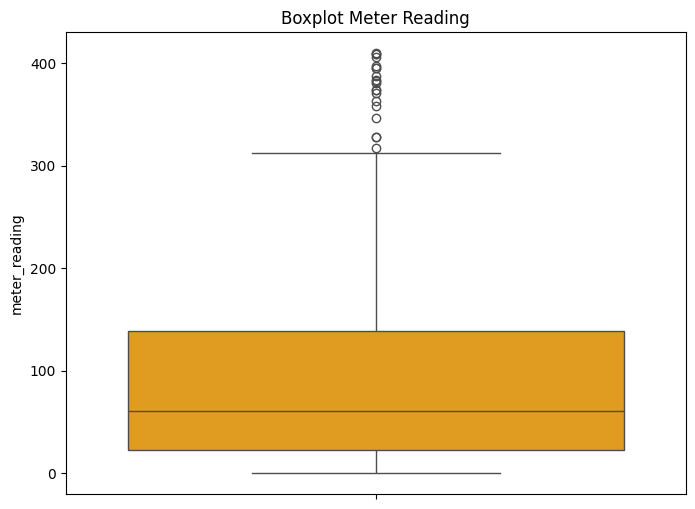

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=y_train, color='orange')
plt.title('Boxplot Meter Reading')
plt.show()


### Relasi Variabel Numerik dengan Target

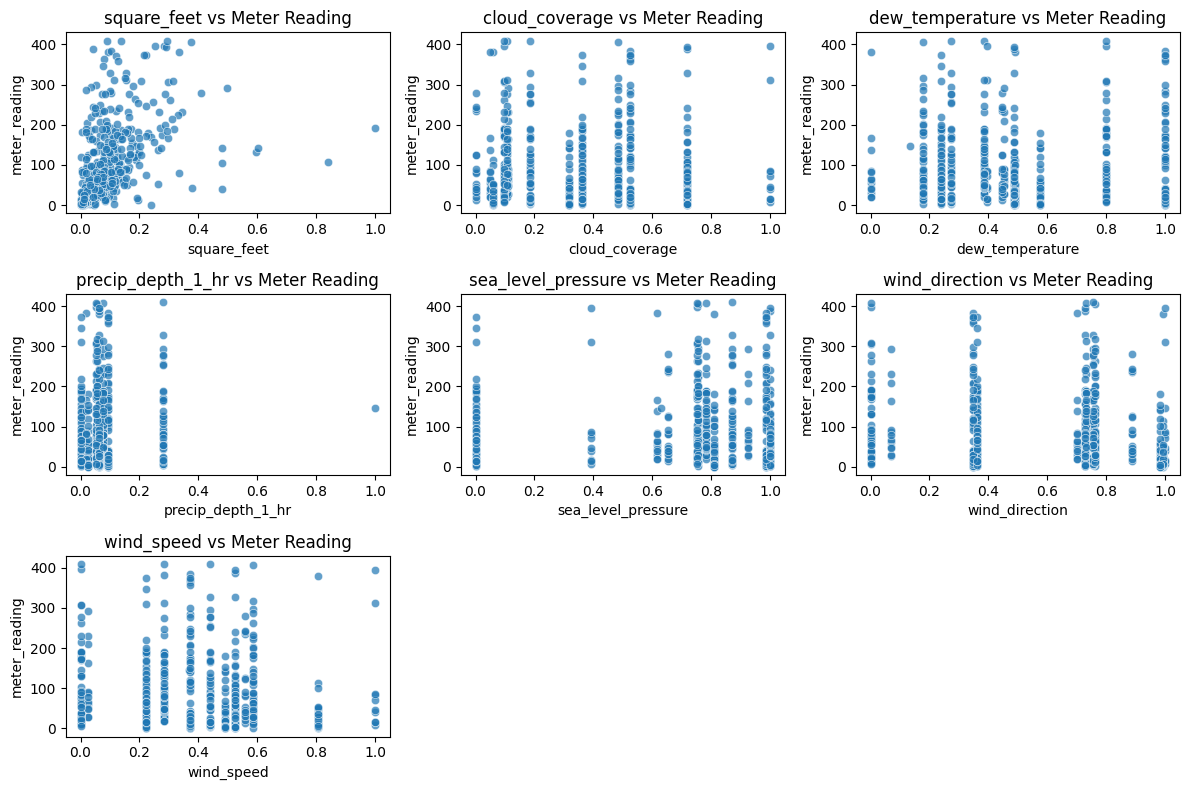

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(col_num):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.7)
    plt.title(f'{col} vs Meter Reading')
    plt.tight_layout()
plt.show()


### Relasi Variabel Kategori dengan Target

<ipython-input-40-c6d2941971c6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='primary_use', y=y_train, data=pd.concat([X_train, y_train], axis=1), palette='viridis')


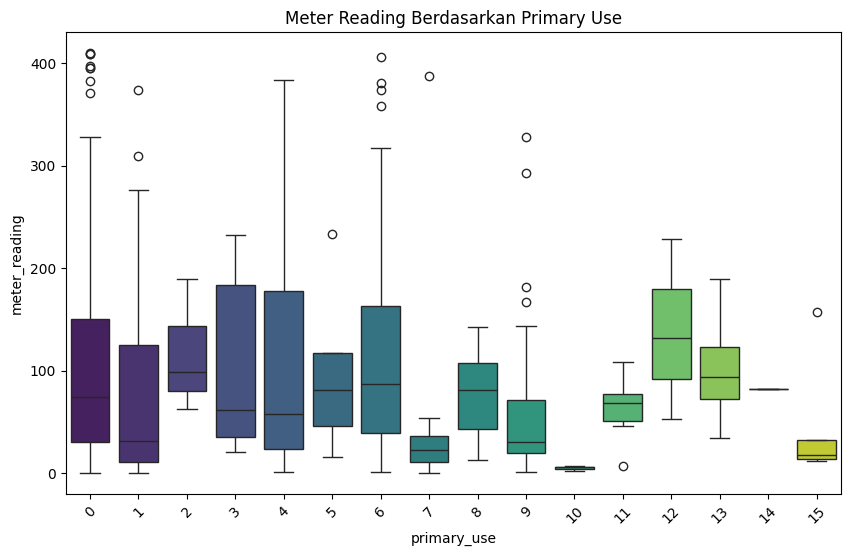

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='primary_use', y=y_train, data=pd.concat([X_train, y_train], axis=1), palette='viridis')
plt.xticks(rotation=45)
plt.title('Meter Reading Berdasarkan Primary Use')
plt.show()


### Analisis Outlier

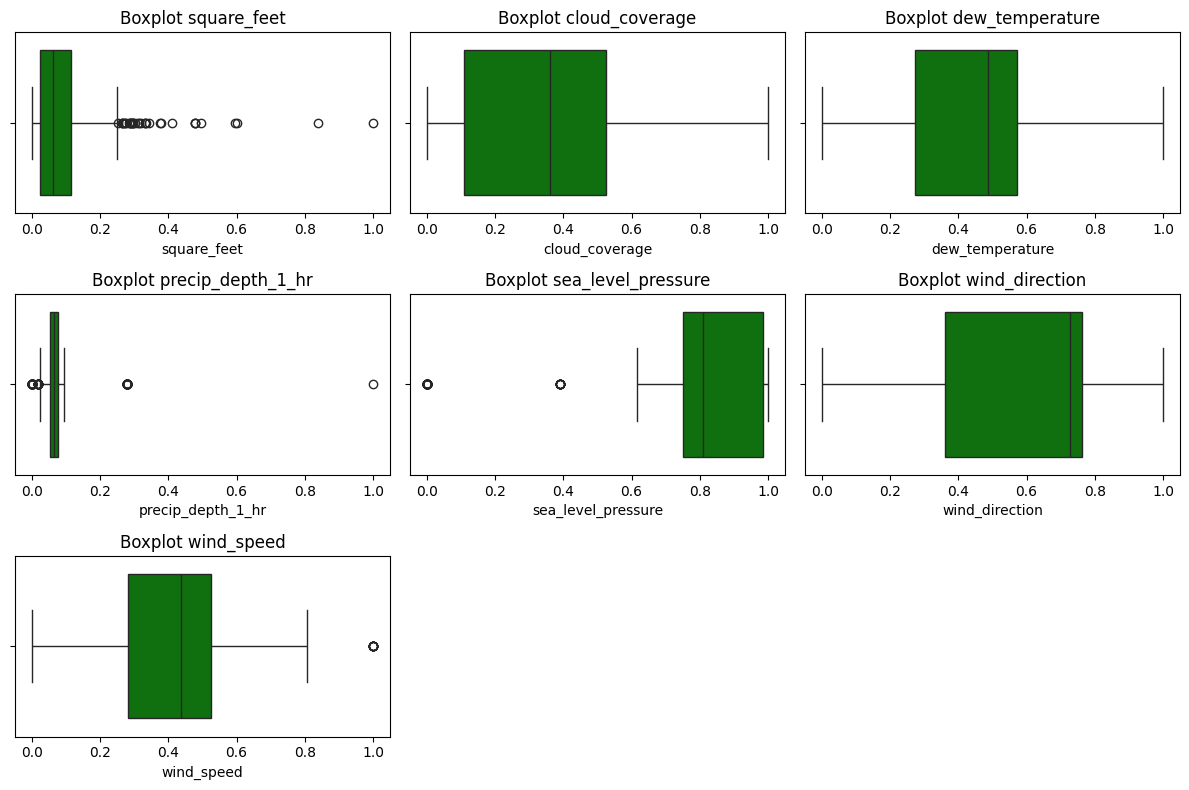

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(col_num):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=X_train[col], color='green')
    plt.title(f'Boxplot {col}')
    plt.tight_layout()
plt.show()


### Analisis Missing Value

<Figure size 1200x600 with 0 Axes>

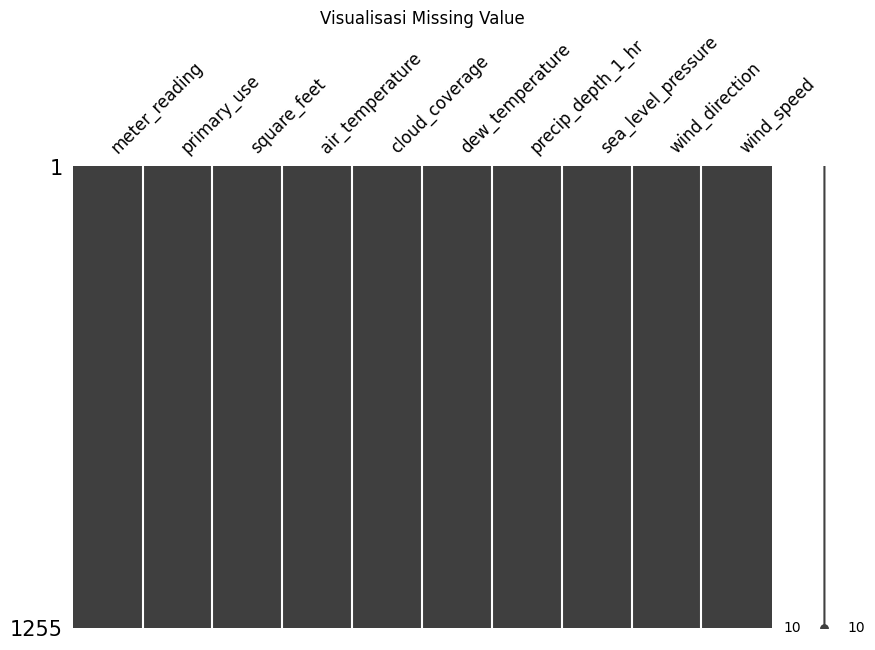

In [ ]:
import missingno as msno

# Visualisasi missing value
plt.figure(figsize=(12, 6))
msno.matrix(df_clean, figsize=(10, 6), fontsize=12)
plt.title('Visualisasi Missing Value')
plt.show()


### Analisis Multikolinearitas

In [ ]:
# Hitung VIF
vif_data = check_multikolinearitas(X_train)
print(vif_data)


Variabel dengan Multikolinearitas Tinggi:
    Variabel        VIF
0  konstanta  21.428107
             Variabel        VIF
0           konstanta  21.428107
1         primary_use   1.077371
2         square_feet   1.046526
3      cloud_coverage   1.497191
4     dew_temperature   2.424067
5   precip_depth_1_hr   1.265065
6  sea_level_pressure   2.030003
7      wind_direction   7.073813
8          wind_speed   5.948422


### Analisis Interaksi

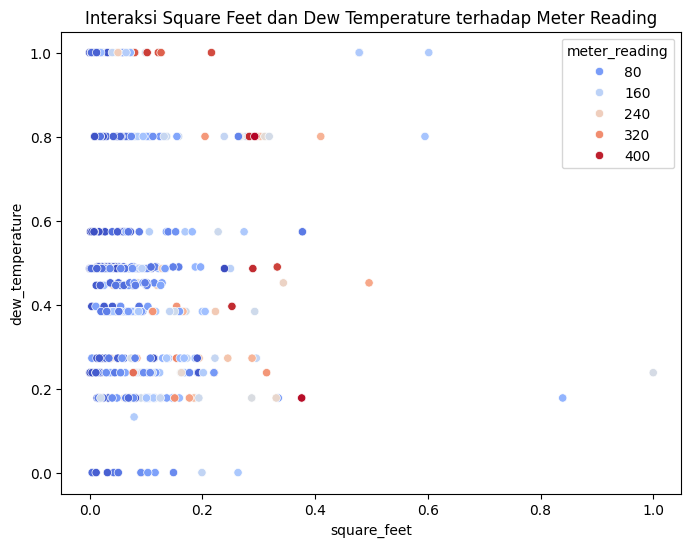

In [ ]:
# Interaksi antara dua variabel numerik
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train['square_feet'], y=X_train['dew_temperature'], hue=y_train, palette='coolwarm')
plt.title('Interaksi Square Feet dan Dew Temperature terhadap Meter Reading')
plt.show()


# Model Dan Evaluasi

### Regresi Linear

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Inisialisasi model Linear Regression
linear_model = LinearRegression()

# Latih model
linear_model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = linear_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE

print("Model Regresi Linear \n")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Model Regresi Linear 

Mean Squared Error: 5851.400991694272
Root Mean Squared Error: 76.4944507248354
R-squared: 0.3184885260766924
Mean Absolute Error: 55.57942271606193


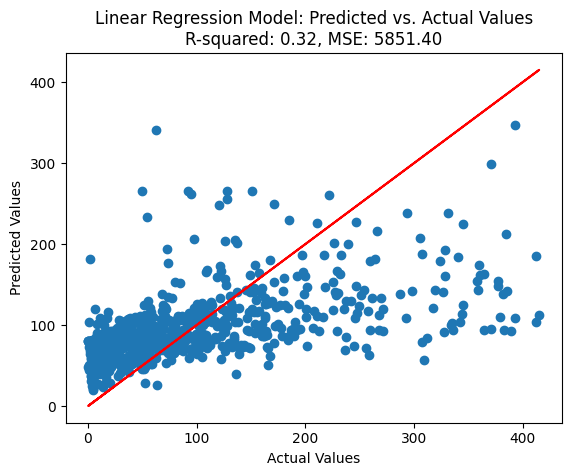

In [ ]:
import matplotlib.pyplot as plt

# Retrieve the predicted values from the linear regression model
y_pred = linear_model.predict(X_test)

# Assuming y_test represents the actual values
plt.scatter(y_test, y_pred)

# Add a perfect fit line (y = x) for comparison
plt.plot(y_test, y_test, color='red')

# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model: Predicted vs. Actual Values\nR-squared: {:.2f}, MSE: {:.2f}'.format(r2, mse))

# Show the plot
plt.show()

### Random Forest

Model Random Forest 

Mean Squared Error: 4647.811513513887
Root Mean Squared Error: 68.17485983494126
R-squared: 0.45867034585585487
Mean Absolute Error: 45.025701996133044


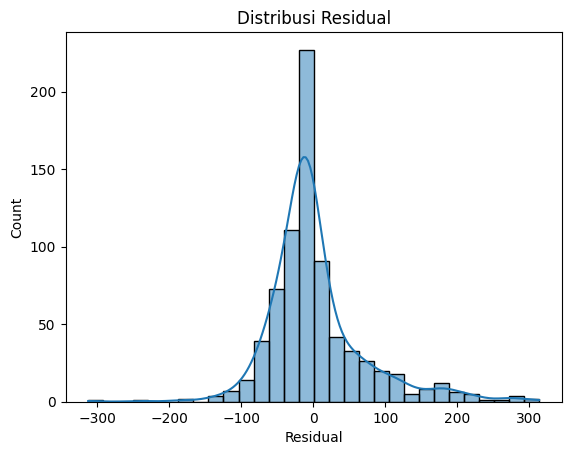

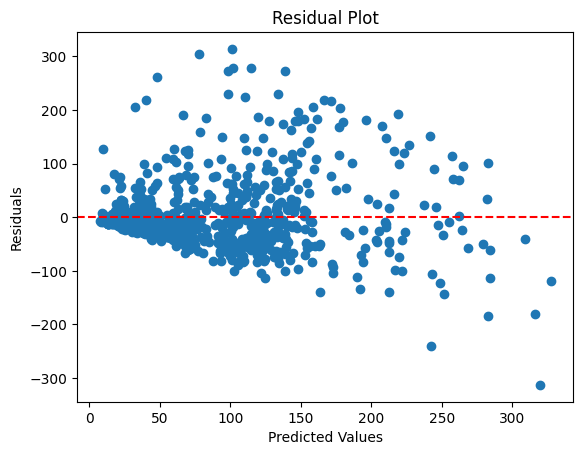

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Inisialisasi model Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Tentukan parameter yang akan di-tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Lakukan Grid Search untuk menemukan hyperparameter terbaik
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Ambil model terbaik dari hasil Grid Search
best_model = grid_search.best_estimator_

# Latih model dengan seluruh data latih
best_model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = best_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE

print("Model Random Forest \n")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

# Analisis Residual
residuals = y_test - y_pred

# Plot distribusi residual
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribusi Residual')
plt.xlabel('Residual')
plt.show()

# Plot residual vs predicted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold


# Inisialisasi model Random Forest
# rf_model = RandomForestRegressor(random_state=42)

# K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []
rmse_scores = []
r2_scores = []
mae_scores = []

for train_index, test_index in kfold.split(X_train):
    # Split data into training and testing sets for this fold
    X_fold_train, X_fold_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]

    # Train the model with the current fold's data
    rf_model.fit(X_fold_train, y_fold_train)

    # Make predictions on the testing set of the current fold
    y_fold_pred = rf_model.predict(X_fold_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_fold_test, y_fold_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_fold_test, y_fold_pred)
    mae = mean_absolute_error(y_fold_test, y_fold_pred)

    # Store the scores
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    mae_scores.append(mae)

# Calculate average scores across all folds
avg_mse = np.mean(mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_r2 = np.mean(r2_scores)
avg_mae = np.mean(mae_scores)

print("Hasil Cross-Validation:")
print("Average Mean Squared Error:", avg_mse)
print("Average Root Mean Squared Error:", avg_rmse)
print("Average R-squared:", avg_r2)
print("Average Mean Absolute Error:", avg_mae)

Hasil Cross-Validation:
Average Mean Squared Error: 5609.98148184227
Average Root Mean Squared Error: 74.64379259107322
Average R-squared: 0.3544529984697803
Average Mean Absolute Error: 51.196771376328094


              Feature  Importance
1         square_feet    0.680931
3     dew_temperature    0.134774
0         primary_use    0.099176
5  sea_level_pressure    0.025342
2      cloud_coverage    0.019453
4   precip_depth_1_hr    0.015466
7          wind_speed    0.014334
6      wind_direction    0.010525


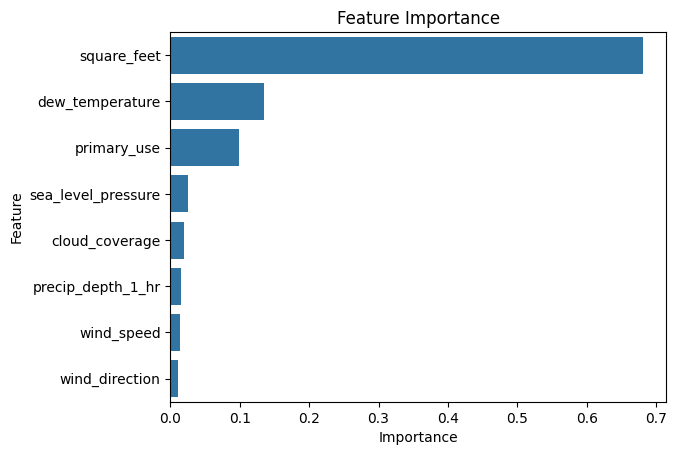

In [ ]:
# Feature importance
importances = best_model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

# Visualisasi feature importance
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

### Decision Tree

Model Desicion Tree 

Mean Squared Error: 8287.765591800686
Root Mean Squared Error: 91.0371659917019
R-squared: 0.03472564057457961
Mean Absolute Error: 59.282698838434136


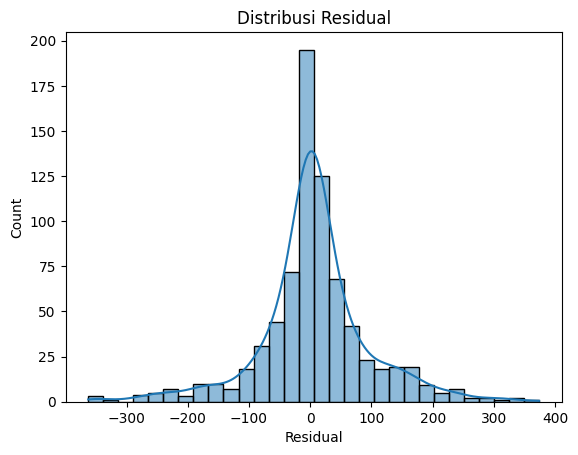

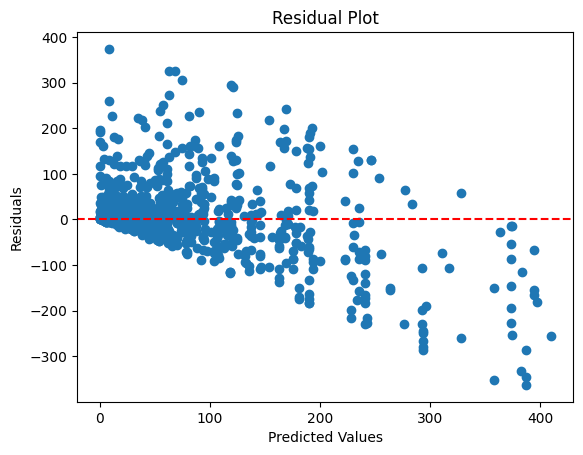

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Membuat model Decision Tree Regressor
model = DecisionTreeRegressor()

# Melatih model
model.fit(X_train, y_train)

# Melakukan prediksi
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE

print("Model Desicion Tree \n")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

# Analisis Residual
residuals = y_test - y_pred

# Plot distribusi residual
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribusi Residual')
plt.xlabel('Residual')
plt.show()

# Plot residual vs predicted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### Cross Validation

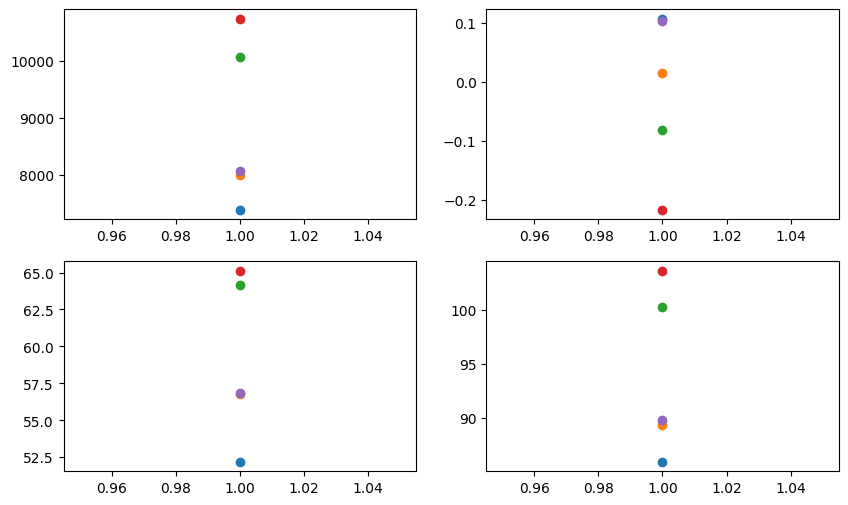

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

# Assuming X is a DataFrame with features and y is a Series with target values

# Check for missing values (optional)
def handle_missing_values(X, y):
  """Handles missing values in X and y.

  Args:
      X: DataFrame containing features.
      y: Series containing target values.

  Returns:
      X: DataFrame with missing values filled (numeric) or dropped (non-numeric).
      y: Series with missing values dropped.
  """
  if pd.api.types.is_numeric_dtype(X):
    X.fillna(X.mean(), inplace=True)  # Fill numeric data with mean
  else:
    X.dropna(inplace=True)  # Drop rows with missing values (non-numeric)
  y.dropna(inplace=True)  # Drop rows with missing values in y
  return X, y

# Preprocess data
X, y = handle_missing_values(X.copy(), y.copy())  # Avoid modifying original data

# Define number of folds
k = 5

# Create model
model = DecisionTreeRegressor()

# Initialize lists to store metrics for each fold
mse_list = []
r2_list = []
mae_list = []
rmse_list = []

# Perform K-Fold Cross Validation and plot results
kf = KFold(n_splits=k, shuffle=True, random_state=42)
fold_num = 1
fig, axs = plt.subplots(2, 2, figsize=(10, 6))  # Create subplots for all metrics

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  # Calculate and store all metrics
  mse = mean_squared_error(y_test, y_pred)
  mse_list.append(mse)

  r2 = r2_score(y_test, y_pred)
  r2_list.append(r2)

  mae = mean_absolute_error(y_test, y_pred)
  mae_list.append(mae)

  rmse = np.sqrt(mse)
  rmse_list.append(rmse)

  # Plot metrics for each fold (optional)
  axs[0, 0].scatter(fold_num, mse, label=f"Fold {fold_num}")
  axs[0, 1].scatter(fold_num, r2, label=f"Fold {fold_num}")
  axs[1, 0].scatter(fold_num, mae, label=f"Fold {fold_num}")
  axs[1, 1].scatter(fold_num, rmse, label=f"Fold {fold_num}")

In [ ]:
print("Cross Validation \n")
print("Mean Squared Error (averaged across folds):", mse)
print("R-squared (averaged across folds):", r2)
print("Mean Absolute Error (averaged across folds):", mae)
print("Root Mean Squared Error (averaged across folds):", rmse)

Cross Validation 

Mean Squared Error (averaged across folds): 8071.457710901501
R-squared (averaged across folds): 0.10407122826124715
Mean Absolute Error (averaged across folds): 56.83143950199011
Root Mean Squared Error (averaged across folds): 89.8412917922572


Karena Perbandingan nilai MSE dari model random forest kurang lebih sama dengan MSE cross validation, dan variabls feature importance dari model Random Forest lebih beragam, maka kita akan menggunakan model random forest

# Insight Model Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Train the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Fitting the model

def get_feature_interactions(model, X_train, feature_names, top_k=5):
    interactions = []

    # Ensure the model is fitted
    if hasattr(model, 'estimators_'):  # Check if the model has the 'estimators_' attribute
        # Traverse through all trees in the Random Forest
        for tree in model.estimators_:
            tree_ = tree.tree_

            # Loop over each internal node of the tree
            for node in range(tree_.node_count):
                # If the node is not a leaf node (leaf nodes are -1)
                if tree_.children_left[node] != tree_.children_right[node]:
                    # Get the feature used at this node
                    feature_left = tree_.feature[tree_.children_left[node]]
                    feature_right = tree_.feature[tree_.children_right[node]]

                    # Make sure the feature indices are valid (non-negative)
                    if feature_left >= 0 and feature_right >= 0:
                        # Record the feature pair (sorted to avoid duplicate pairs in reverse order)
                        interactions.append(tuple(sorted([feature_names[feature_left], feature_names[feature_right]])))

        # Count the frequency of feature interactions
        interaction_counts = pd.Series(interactions).value_counts()

        # Return the top_k most frequent interactions
        top_interactions = interaction_counts.head(top_k)

        return top_interactions
    else:
        raise ValueError("The model has not been fitted yet.")

# Now you can call the function
feature_names = X_train.columns.tolist()  # List of feature names
interactions = get_feature_interactions(rf_model, X_train, feature_names, top_k=5)

# Print the top 5 feature interactions
print(interactions)

(square_feet, square_feet)        6925
(primary_use, square_feet)        3578
(dew_temperature, square_feet)    1161
(cloud_coverage, square_feet)     1064
(square_feet, wind_direction)      891
Name: count, dtype: int64


In [ ]:
feature_names

['primary_use',
 'square_feet',
 'cloud_coverage',
 'dew_temperature',
 'precip_depth_1_hr',
 'sea_level_pressure',
 'wind_direction',
 'wind_speed']

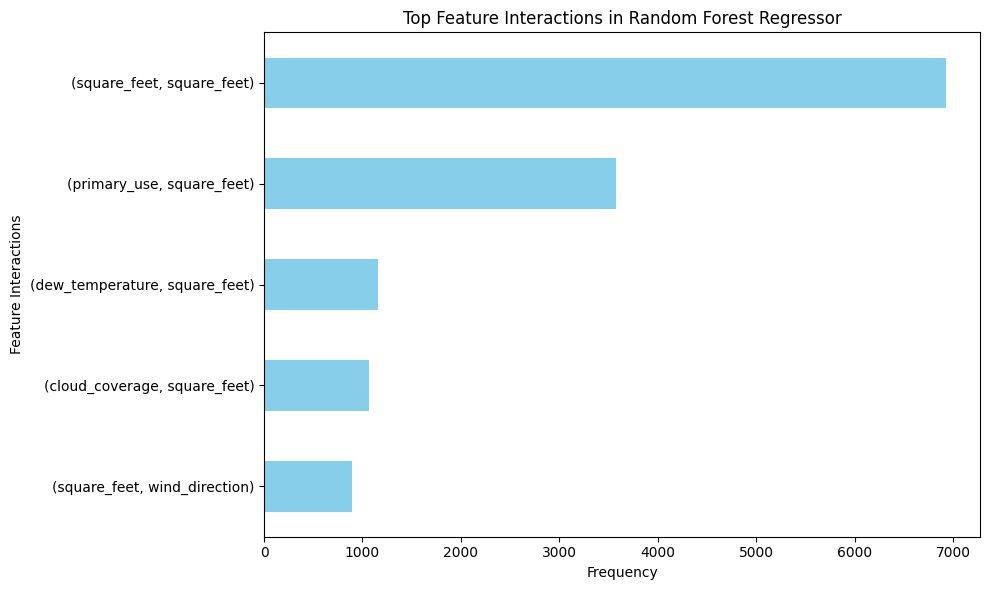

In [ ]:
# Plot hasil interaksi fitur
def plot_feature_interactions(interactions):
    plt.figure(figsize=(10, 6))
    interactions.sort_values(ascending=True).plot.barh(color='skyblue')
    plt.xlabel("Frequency")
    plt.ylabel("Feature Interactions")
    plt.title("Top Feature Interactions in Random Forest Regressor")
    plt.tight_layout()
    plt.show()

# Panggil fungsi plot
plot_feature_interactions(interactions)

dari plot diatas terlihat ada 5 pasangan interaksi variable yang saling berpengaruh
* Besarnya penggunaan energi juga dapat dipengaruhi oleh interaksi anatar variabel atau fitur, seperti:
 - **Luas bangunan dan untuk kegiatan apa bangunan digunakan.** Sebuah bangunan luas dengan yang sama dapat memakai energi dalam jumlah yang berbeda tergantung untuk kegiatan apa bagunan digunakan, seperti penggunaan energi disebuah kantor yang luasnya sama dengan  dengan sekolah akan menggunakan energi dalam jumlah yang  berbeda.
 - **Luas bangunan dan suhu.** Banyaknya pengunaan energi 2 buah bangunan dengan luas yang sama akan berbeda ketika suhu berbeda.
 - **Luas bangunan dan cuaca.** Penggunaan energi akan berbeda untuk dua banguan dengan luas yang sama ketika cuaca didaerah bangunan berada berbeda.
 - **Luas bangunan dengan arah kompas bangunan.** Penggunaan energi akan berbeda untuk dua banguan dengan luas yang sama ketika memiliki arah bangunan yang berbeda. misalnya bangunan menghadap arah kompas yang searah dengan terbitnya matahari (timur) dapat menghemat energi dengan tidak menggunkan lampu ketika siang hari karena mengadap matahari dibandingkan bangunan  yang membelakangi matahari.

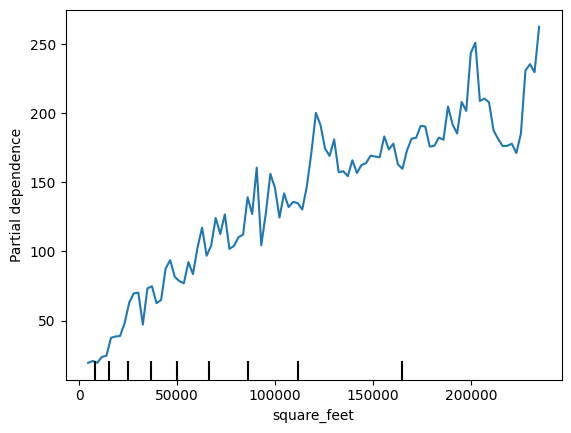

In [ ]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
PartialDependenceDisplay.from_estimator(rf_model, X_train, features=['square_feet'])

Insight:

Konsumsi energi meningkat seiring bertambahnya luas bangunan, menunjukkan bahwa bangunan yang lebih besar menggunakan lebih banyak energi.

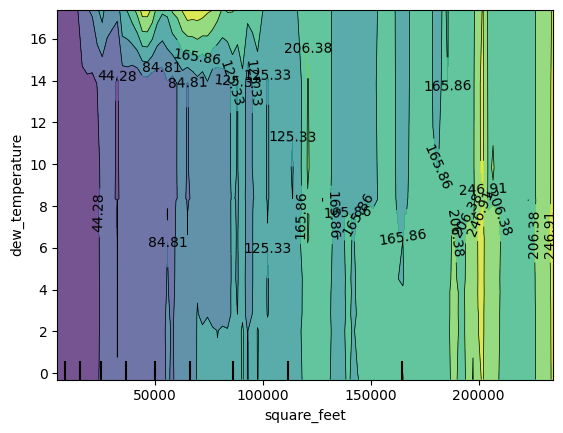

In [ ]:
PartialDependenceDisplay.from_estimator(rf_model, X_train, features=[('square_feet', 'dew_temperature')])


* Area dengan nilai square_feet kecil (misalnya, di bawah 50,000) dan dew_temperature rendah cenderung menghasilkan prediksi penggunaan energi yang lebih rendah.
* Penggunaan energi meningkat saat square_feet bertambah (terutama di atas 150,000) dan dew_temperature mendekati nilai sedang hingga tinggi (sekitar 8–15).
  



Insight :

Konsumsi energi meningkat seiring dengan bertambahnya luas bangunan dan suhu embun. Kedua faktor ini signifikan dalam mempengaruhi konsumsi energi.

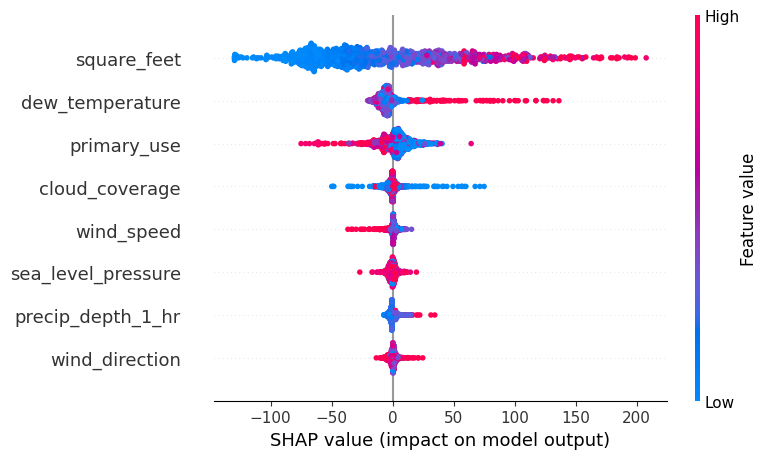

In [ ]:
import shap

# Membuat objek SHAP
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train)

# Visualisasi nilai SHAP untuk keseluruhan dataset
shap.summary_plot(shap_values, X_train, feature_names=feature_names)

# Visualisasi untuk satu sampel (penjelasan lokal)
shap.force_plot(explainer.expected_value, shap_values[0], X_train.iloc[0])


Deskripsi:

Plot SHAP ini menunjukkan dampak berbagai fitur terhadap output model.  (biru rendah, merah tinggi).

Insight:

square_feet dan dew_temperature memiliki dampak terbesar terhadap output model. primary_use dan cloud_coverage juga memberikan kontribusi signifikan.

**Kesimpulan**

**Faktor Utama Konsumsi Energi:**

Luas Bangunan (square_feet):

Bangunan yang lebih besar cenderung menggunakan lebih banyak energi.


Suhu Embun (dew_temperature):

Suhu embun yang lebih tinggi juga meningkatkan konsumsi energi.



Pemantauan Faktor Cuaca:


Pasang sistem pemantauan cuaca untuk mengantisipasi perubahan yang mempengaruhi konsumsi energi.


**Penggunaan Bangunan (primary_use):**


Jenis penggunaan bangunan sangat mempengaruhi seberapa banyak energi yang digunakan. Contohnya, kantor mungkin menggunakan energi lebih banyak daripada rumah.




**Faktor Cuaca:**


(cloud_coverage), Kecepatan Angin (wind_speed), Tekanan Permukaan Laut (sea_level_pressure), dan Curah Hujan (precipitation): Faktor-faktor ini juga mempengaruhi penggunaan energi, meskipun pengaruhnya tidak sebesar luas bangunan dan suhu embun.





**Rekomendasi:**


Optimalisasi Penggunaan Energi:


Fokuskan strategi penghematan energi pada bangunan besar dan area dengan suhu embun tinggi.


Segmentasi Berdasarkan Penggunaan:


Terapkan strategi pengelolaan energi yang disesuaikan untuk setiap jenis penggunaan bangunan.